In [17]:
import json
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [18]:

file_path = 'results_12.json'

with open(file_path, 'r') as file:
    data = json.load(file)


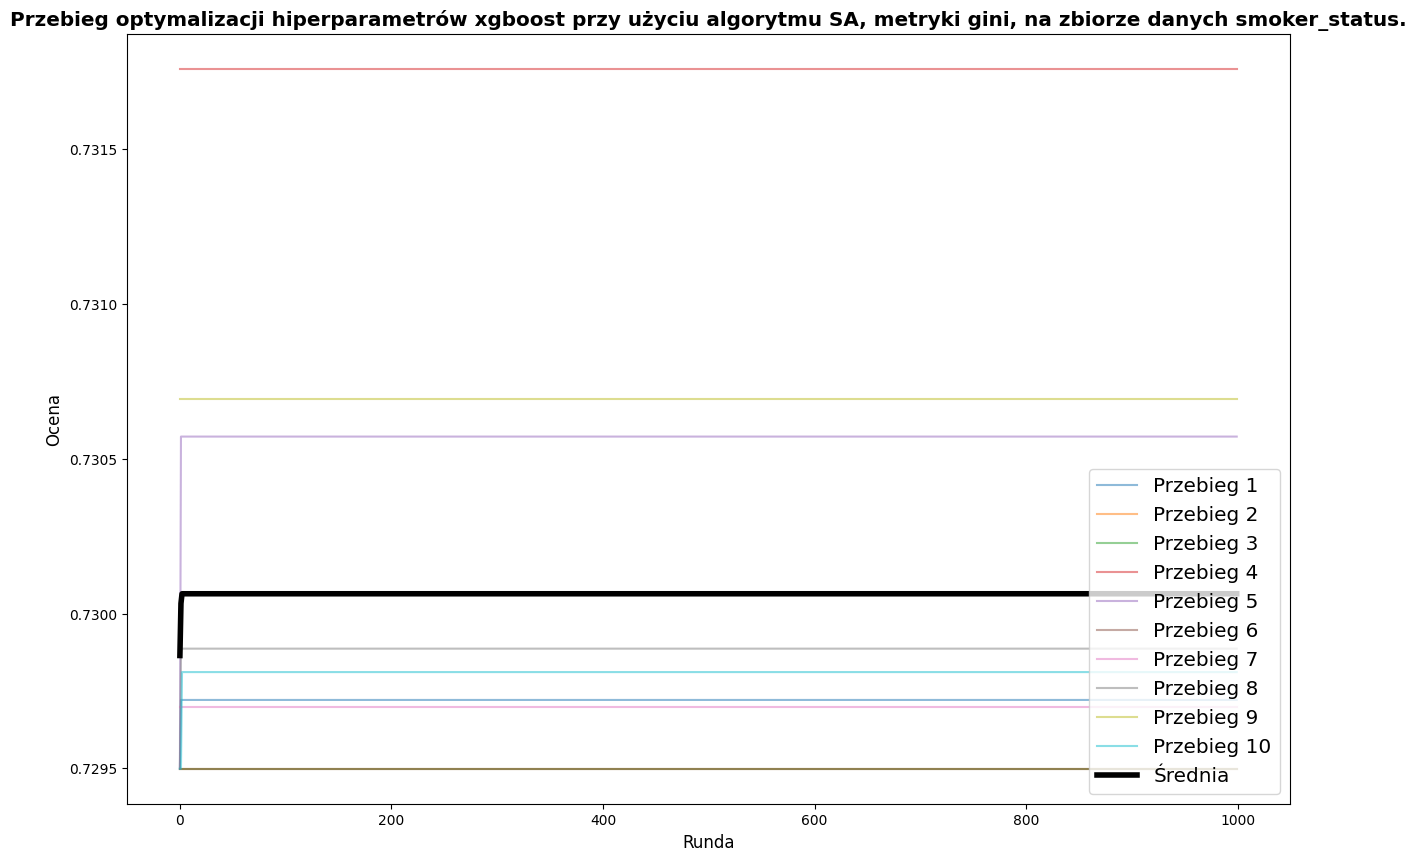

In [19]:
for key, value in data.items():
    plt.figure(figsize=(15, 10))
    algorithm, metric, dataset = key.split('-')
    for i in range(10):
        history = value[i][1][1]
        plt.plot(history, alpha=0.5, label=f'Przebieg {i + 1}')
        
    mean_history = np.mean([np.array(value[i][1][1]) for i in range(10)], axis=0)
    plt.plot(mean_history, linewidth=4, color='black', label='Średnia')
    plt.title(f'Przebieg optymalizacji hiperparametrów xgboost przy użyciu algorytmu {algorithm}, metryki {metric}, na zbiorze danych {dataset}.', fontsize='x-large', weight='bold')
    plt.legend(loc='lower right', fontsize='x-large')
    plt.ylabel("Ocena", fontsize='large')
    plt.xlabel("Runda", fontsize='large')
    plt.savefig(f'plots/v3/history/{key}.png' )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


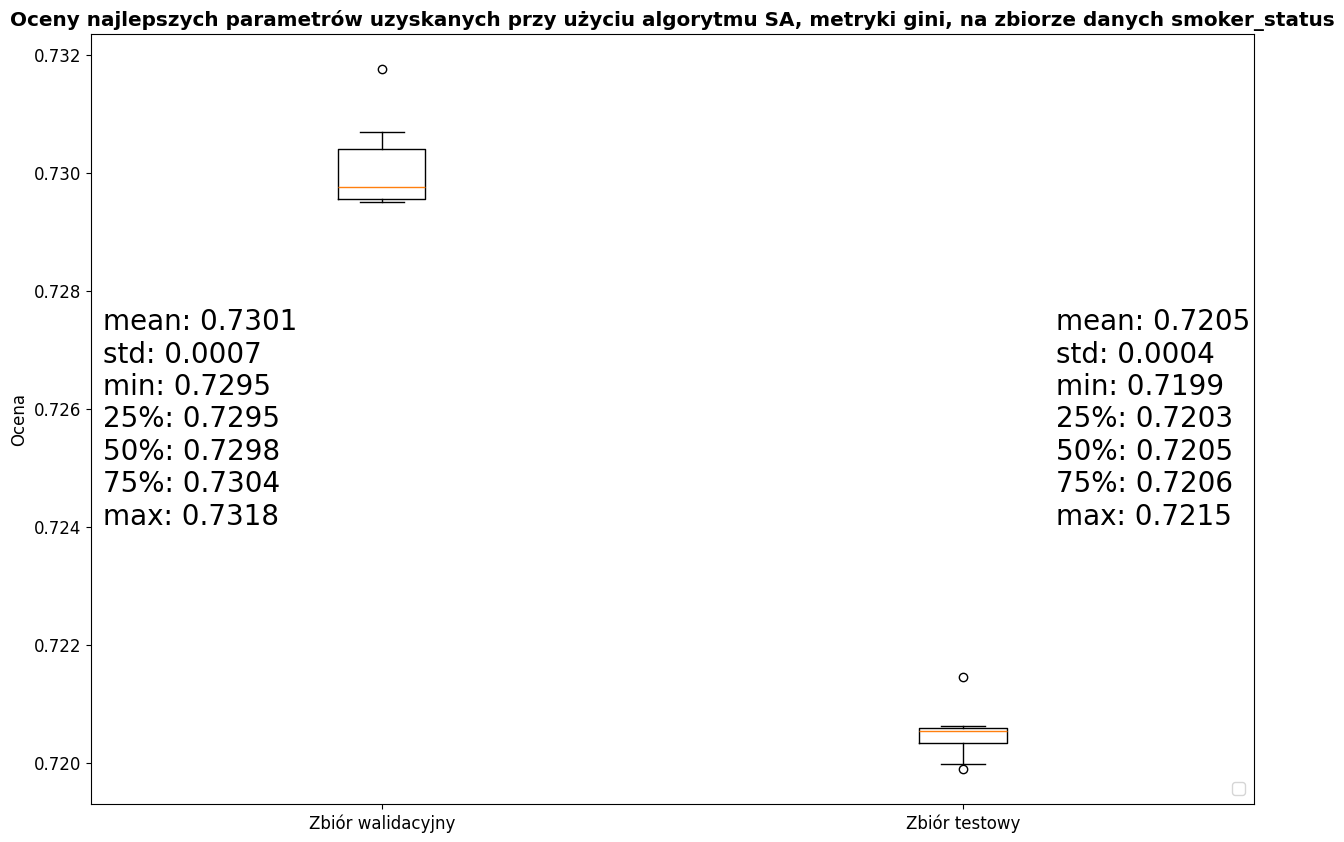

In [20]:
for key, value in data.items():
    plt.figure(figsize=(15, 10))
    algorithm, metric, dataset = key.split('-')
    
    best_point_val_list = [value[i][1][0] for i in range(10)]
    best_point_test_list = [value[i][1][2] for i in range(10)]

    plt.boxplot([best_point_val_list, best_point_test_list], labels=['Zbiór walidacyjny', 'Zbiór testowy'])
    
    val_df = pd.DataFrame(best_point_val_list)
    test_df = pd.DataFrame(best_point_test_list)
    
    val_stats = val_df.describe()
    test_stats = test_df.describe()
    
    stats_text_left = '\n'.join([f'{stat[1]}: {value:.4f}' for stat, value in val_stats.transpose().stack().items() if stat[1] != 'count'])
    stats_text_right = '\n'.join([f'{stat[1]}: {value:.4f}' for stat, value in test_stats.transpose().stack().items() if stat[1] != 'count'])

    plt.title(f'Oceny najlepszych parametrów uzyskanych przy użyciu algorytmu {algorithm}, metryki {metric}, na zbiorze danych {dataset}', fontsize='x-large', weight='bold')
    plt.legend(loc='lower right', fontsize='large')

    plt.text(0.01, 0.5, stats_text_left, transform=plt.gca().transAxes, fontsize=20, verticalalignment='center')
    plt.text(0.83, 0.5, stats_text_right, transform=plt.gca().transAxes, fontsize=20, verticalalignment='center')
    
    plt.xticks(fontsize='large')
    plt.yticks(fontsize='large')
    plt.ylabel("Ocena", fontsize='large')
    plt.savefig(f'plots/v3/best_results/{key}.png')

